In [112]:
import networkx as nx
import matplotlib.pyplot as plt 

In [166]:
G = nx.DiGraph()

nodeList = [
    "S3A", "S3B", "S3G", "S3H",
    "S2C", "S2D", "S2I",
    "S1E", "S1L",
    "TC",
    "R1K", "R1M",
    "R2N", "R2O",
    "R3R", "R3S", "R3T"
]



for i in nodeList:
    G.add_node(i)
    
nodeColor = ["#DDF9E6"]*4 + ["#83DE8F"]*3 + ["#70BF7B"]*2 + ["#E4BE01"] + ["#FC2E50"]*2 + ["#FC7A8F"]*2 + ["#F9CAD2"]*3

In [170]:
G.add_edge("S3A", "S2C", weight=1)
G.add_edge("S3B", "S2D", weight=3)
G.add_edge("S3G", "S2I", weight=1)
G.add_edge("S3H", "S2I", weight=2)

G.add_edge("S2C", "S1E", weight=2)
G.add_edge("S2C", "R1K", weight=1)
G.add_edge("R1K", "S2C", weight=1)
G.add_edge("S2D", "S1E", weight=2)
G.add_edge("S2I", "S1L", weight=4)
G.add_edge("S2I", "R1K")
G.add_edge("R1K", "S2I")
G.add_edge("S2I", "R1M", weight=5)
G.add_edge("R1M", "S2I", weight=5)
G.add_edge("S1E", "TC", weight=3)
G.add_edge("S1L", "TC", weight=6)

G.add_edge("TC", "R1K", weight=4)
G.add_edge("TC", "R1M", weight=3)

G.add_edge("R1K", "R2N", weight=4)
G.add_edge("R1M", "R2O", weight=2)

G.add_edge("R2N", "R3R", weight=1)
G.add_edge("R2N", "R3S", weight=5)
G.add_edge("R2O", "R3T", weight=4)

G.add_edge("R3S", "R3T", weight=2)

pos = nx.spring_layout(G, k=10)


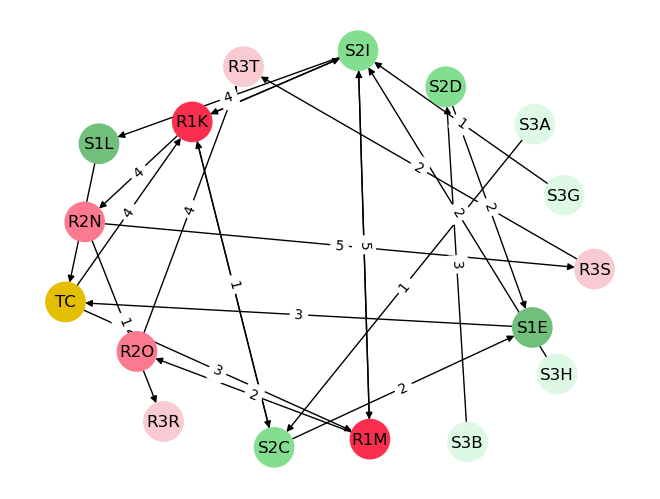

In [171]:
nx.draw(G, pos, with_labels=True, node_color = nodeColor, node_size=800)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()